# Sample visualization based on the perfomance

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

import os 
os.chdir('/home/daniel/school/BP')

### Vyjmenovane slova po b

In [3]:
slova_po_b = pd.read_csv('data/processed/vyjmenovana_slova_po_b.csv')

In [4]:
students_count = len(slova_po_b['user'].unique())
questions_count = len(slova_po_b['question'].unique())

print('count of students: {}, count of questions: {}'.format(students_count, questions_count))

count of students: 4697, count of questions: 269


In [5]:
correctness_matrix = slova_po_b.pivot(index='user', columns='question_id', values='correct')
correctness_matrix.head()

question_id,1,2,3,4,5,16,17,18,19,20,...,6378,6379,6380,6381,6382,6383,6384,6385,6386,6387
user,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
383,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5622,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
similarity_matrix = correctness_matrix.corr(min_periods=1)
similarity_matrix.head()

question_id,1,2,3,4,5,16,17,18,19,20,...,6378,6379,6380,6381,6382,6383,6384,6385,6386,6387
question_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.067729,-0.065532,0.029852,0.203023,0.173722,0.192155,0.170330,0.192077,0.098420,...,0.031870,0.096728,0.052045,0.145268,0.082772,0.082613,0.092384,0.069774,0.099021,0.144984
2,0.067729,1.000000,0.026072,0.198031,0.022561,0.039480,0.157432,0.083433,0.039993,0.086193,...,0.150850,0.065805,0.076912,0.055621,0.053004,-0.004722,0.171386,0.080482,0.169292,0.104281
3,-0.065532,0.026072,1.000000,-0.037878,0.057602,-0.061370,-0.075741,0.049761,-0.084215,0.009946,...,0.077319,0.030995,-0.039814,-0.057534,0.013740,-0.033695,0.086395,0.177518,0.052885,-0.036027
4,0.029852,0.198031,-0.037878,1.000000,0.148359,-0.032275,-0.015930,0.176064,-0.051497,0.055328,...,0.057736,-0.000509,0.070776,0.160340,0.099891,0.231711,0.235570,0.066612,0.103506,0.190104
5,0.203023,0.022561,0.057602,0.148359,1.000000,0.132011,0.047613,-0.025226,0.090064,0.052537,...,-0.021501,-0.046979,0.066622,0.022972,0.175338,0.037437,0.039652,0.024282,0.141827,0.102478


In [7]:
# unique values in whole dataframe 
pd.unique(similarity_matrix.values.ravel())

array([ 1.        ,  0.06772943, -0.06553204, ...,  0.31368744,
        0.05056537,  0.1816504 ])

In [8]:
# not using pandas dropna because it would drop the label if any NA values are present
# therefore I will find the row, which has the most NaNs and drop that one

while similarity_matrix.isnull().sum().sum() > 0:
    most_nans = similarity_matrix.isnull().sum().idxmax()
    similarity_matrix = similarity_matrix.drop(most_nans, axis=0)
    similarity_matrix = similarity_matrix.drop(most_nans, axis=1)

In [9]:
#double pearson
similarity_matrix = similarity_matrix.corr()
similarity_matrix.head()

question_id,1,2,3,4,5,16,17,18,19,20,...,6378,6379,6380,6381,6382,6383,6384,6385,6386,6387
question_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.103372,-0.174399,0.003671,0.236320,0.316468,0.312443,0.359907,0.286163,0.253968,...,-0.032299,0.055376,0.096549,0.170899,0.116109,0.017024,0.109159,-0.029162,0.082606,0.223712
2,0.103372,1.000000,-0.050600,0.315835,0.138928,0.063287,0.306323,0.190171,0.012670,0.040658,...,0.258512,0.040504,0.231120,0.045942,0.218283,0.051310,0.318868,0.134635,0.263333,0.262941
3,-0.174399,-0.050600,1.000000,-0.123254,0.033626,-0.187767,-0.153282,-0.054842,-0.190741,-0.082820,...,-0.035057,-0.072560,-0.130740,-0.145683,-0.027837,-0.107373,-0.007071,0.179757,-0.011310,-0.209397
4,0.003671,0.315835,-0.123254,1.000000,0.158098,-0.096977,0.013540,0.196156,-0.102038,-0.024063,...,0.120328,-0.042726,0.137678,0.230388,0.176287,0.294131,0.311556,0.059172,0.168607,0.182106
5,0.236320,0.138928,0.033626,0.158098,1.000000,0.068710,0.077024,0.062947,0.053743,0.046204,...,0.053868,-0.082999,0.142490,-0.059235,0.404588,-0.011111,0.084348,-0.004462,0.154741,0.235364


In [10]:
model = TSNE(perplexity=15, learning_rate=200, n_iter=200000)
result = model.fit_transform(similarity_matrix)
x_positions = result[:, 0]
y_positions = result[:, 1]
# x_positions = result_positions[0]
# y_positions = result_positions[1]
# result_positions = result.T

In [11]:
import re
def cut_question(question):
    return re.search(",\"(.*?)\"]]", question).group(1)

In [12]:
slova_po_b['question'] = slova_po_b['question'].apply(cut_question)

In [13]:
question_ids = similarity_matrix.index
slova_po_b = slova_po_b.set_index('question_id')
questions_text = np.array([slova_po_b.at[question_id, 'question'][0] for question_id in question_ids])
practice_sets = np.array([slova_po_b.at[question_id, 'ps'][0] for question_id in question_ids])

In [14]:
d = {'x': x_positions, 'y': y_positions, 'label': questions_text, 'ps': practice_sets}
df = pd.DataFrame(data=d)
df.index.name = 'id'

### matplotlib

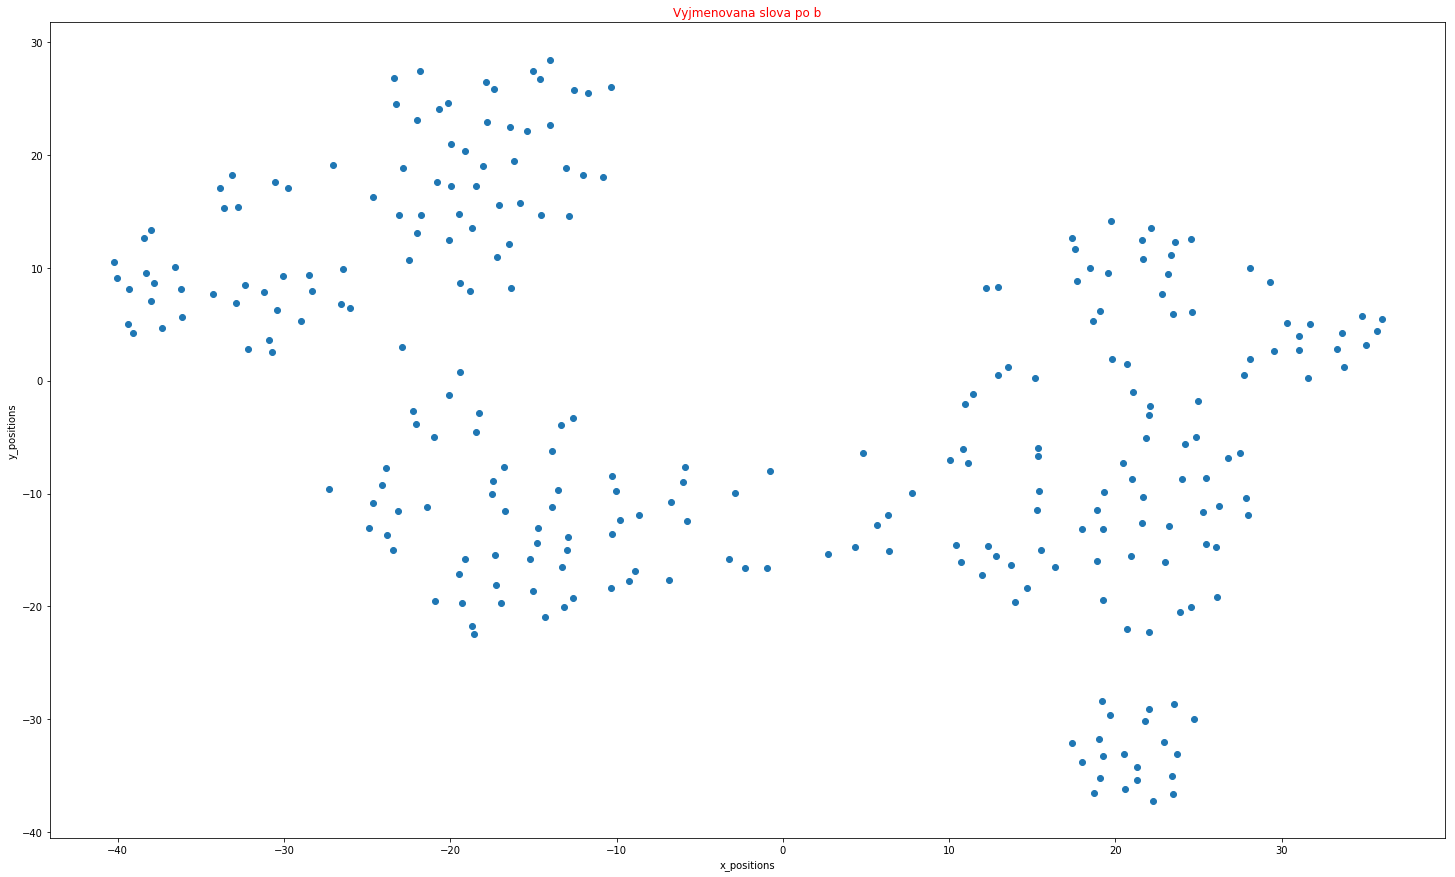

In [15]:
plt.gcf().set_size_inches(25, 15)
plt.title('Vyjmenovana slova po b', color='red')
plt.xlabel('x_positions')
plt.ylabel('y_positions')
plt.scatter(df['x'], df['y'])
# plt.legend(loc=2)
plt.show()

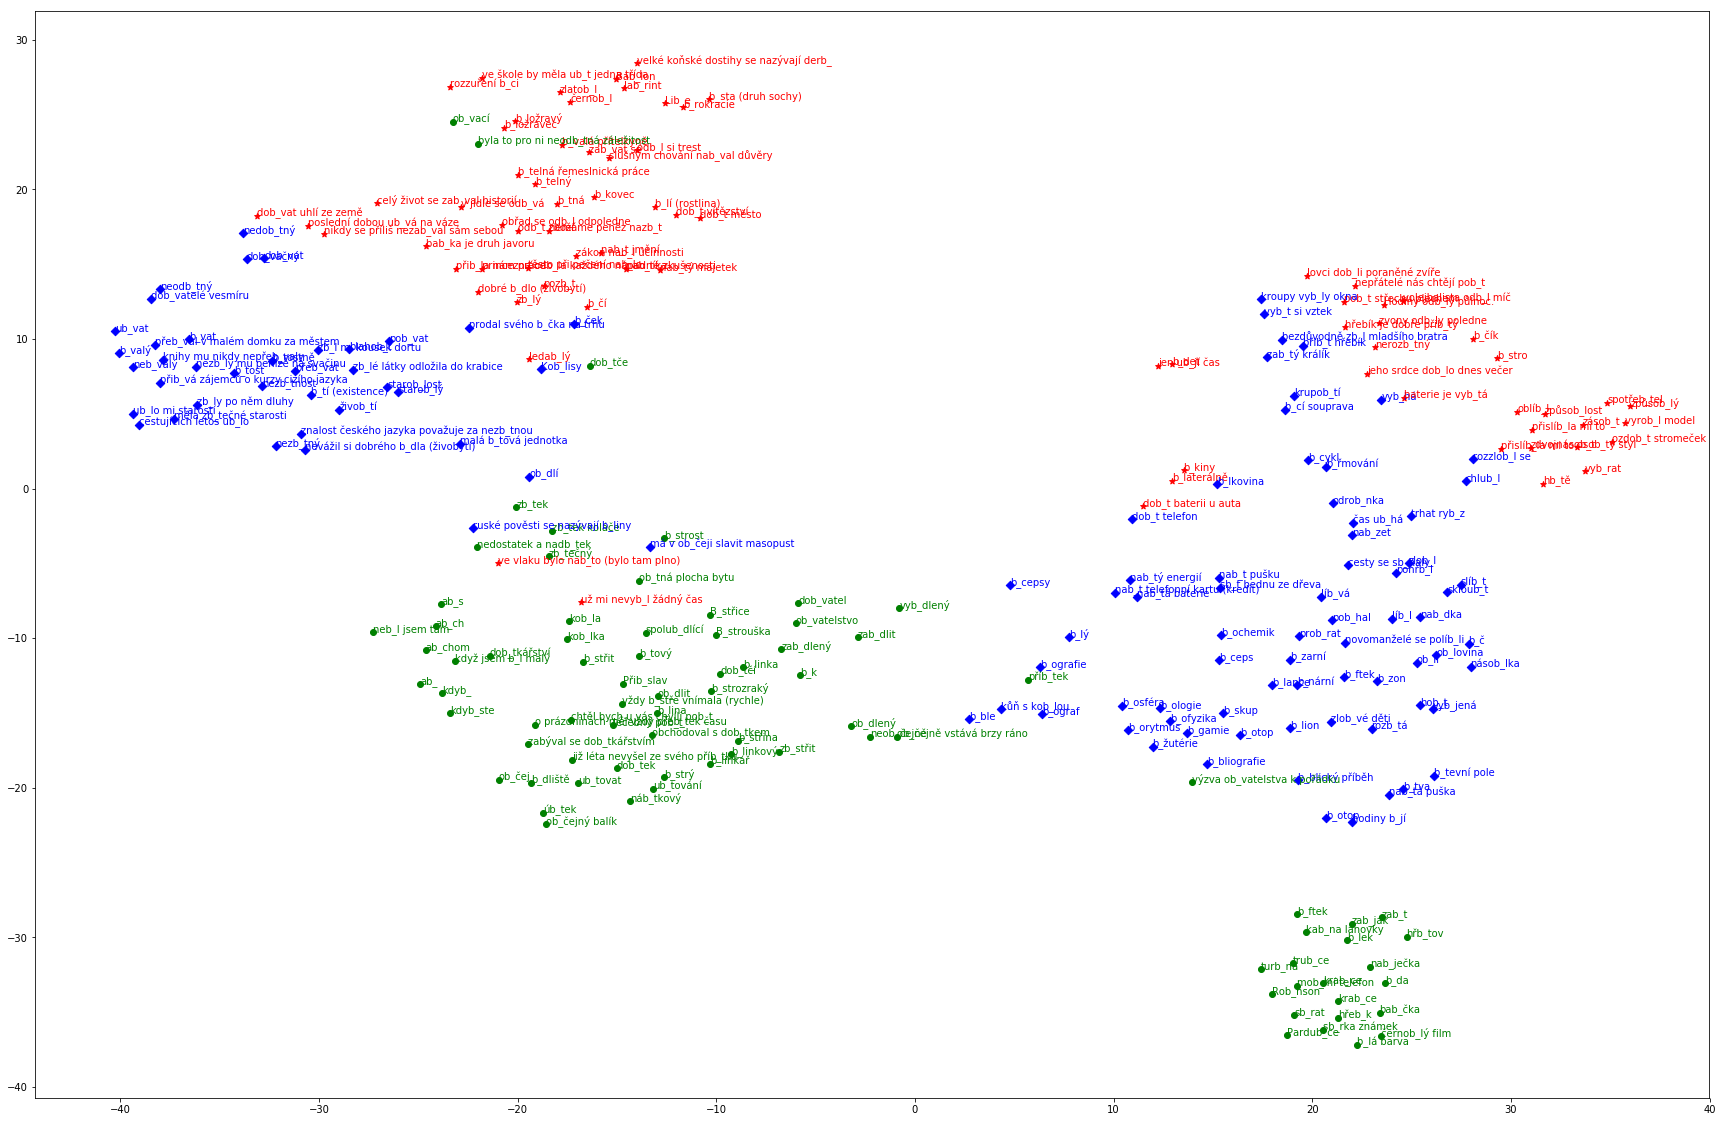

In [16]:
# plot with labels and colors based on the PS level

fig, ax = plt.subplots(figsize=(30,20))
# plt.gcf().set_size_inches(25, 15)
# plt.figure(figsize=(25,15))
# ax.scatter(df.x, df.y, marker='s')

for i, txt in enumerate(df.label):
    if df.ps[i] == 383:
        ax.scatter(df.x[i], df.y[i], marker='o',c='green')
        ax.annotate(txt, (df.x[i],df.y[i]), color='green')
    elif df.ps[i] == 384:
        ax.scatter(df.x[i], df.y[i], marker='D', c='blue')
        ax.annotate(txt, (df.x[i],df.y[i]), color='blue')
    elif df.ps[i] == 385:
        ax.scatter(df.x[i], df.y[i], marker='*', c='red')
        ax.annotate(txt, (df.x[i],df.y[i]), color='red')

plt.show()
# fig.savefig('visualizations/double_pearson_tsne_perplexity15_slova_po_b_figure-30x20.png')

In [17]:
# import plotly
# from plotly.graph_objs import Scatter, Layout

# plotly.offline.plot({
#     "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
#     "layout": Layout(title="hello world")
# })

### plotly

In [18]:
import plotly
import plotly.offline as offline
import plotly.graph_objs as go
# import plotly
# from plotly.graph_objs import Scatter, Layout

level_1 = df[df.ps == 383]
level_2 = df[df.ps == 384]
level_3 = df[df.ps == 385]

trace1 = go.Scatter(
    x=level_1.x,
    y=level_1.y,
    mode='markers+text',
    name='LEVEL 1',
    text=level_1.label,
    textposition='middle right',
    hoverinfo='text',
    textfont={'color':'green'},
    marker={'symbol':'circle','color':'green'}
)
trace2 = go.Scatter(
    x=level_2.x,
    y=level_2.y,
    mode='markers+text',
    name='LEVEL 2',
    text=level_2.label,    
    hoverinfo='text',
    textfont={'color':'blue'},
    marker={'symbol':'diamond','color':'blue'},
    textposition='middle right'
)
trace3 = go.Scatter(
    x=level_3.x,
    y=level_3.y,
    mode='markers+text',
    name='LEVEL 3',
    text=level_3.label,
    hoverinfo='text',
    textfont={'color':'red'},
    marker={'symbol':'star','color':'red'},
    textposition='middle right'
)
data = [trace1, trace2, trace3]
layout = go.Layout(
    title="Used: 'slova po b', TSNE: perplexity={0}, learning_rate={1}, n_iter={2}".format(model.perplexity, model.learning_rate, model.n_iter),
    titlefont={'family':'Arial','size':20},
    showlegend=True,
    xaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=True,
        autotick=True,
        ticks="outside",
        showticklabels=True
    ),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=True,
        autotick=True,
        ticks="outside",
        showticklabels=True
    ),
    hovermode='closest'
)
fig = go.Figure(data=data, layout=layout)
plot_url = offline.plot(fig, filename='double_pearson_slova_po_b-1-3levels.html')